# Decision Trees

## Objective: Predict whether a passenger on the titanic survived or not

In [5]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Loading in the data

In [6]:
# Load in some data
df = pd.read_csv("http://bit.ly/wkspdata")
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Preprocess the data and EDA

In [7]:
def preprocess(df):
    
    # Drop features which are not important the model
    # name, cabin, ticket
    df = df.drop(["name", "cabin", "ticket"], axis=1)
    
    # Drop all rows which have NaN values
    df = df.dropna()
    
    #Converting categorical to numeric values
    categorical_features=["pclass","embarked","sex"]
    df = pd.get_dummies(df, columns = categorical_features)
    
    return df

In [8]:
df = preprocess(df)
df.head()

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


## Exercise

#### Now that you have seen a lot of EDA being done on other datasets, can you come up with various charts/graphs for the dataset above and discuss insights/relationships between the features and the target?

### Step 3: Split the data and train the model

In [9]:
# 1)

X = df.drop(['survived'], axis=1) # input
y = df['survived'] # output (dependent variable)

In [11]:
# 2) Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=42)

In [12]:
# Import the Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

### Using a technique called Cross Validation, we try to find the best parameters for the decision tree classifier

In [13]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1,10),
              'min_samples_split': range(1, 10),
              'min_samples_leaf': range(1, 5)}

gs_clf = GridSearchCV(clf,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='f1_macro')

In [26]:
# These are the best parameters for the decision tree classifier
gs_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=9, random_state=42)

In [14]:
# Training the final model using the best parameters from above fine-tuning
classifier = gs_clf.best_estimator_
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=9, random_state=42)

### Visualizing the Decision Tree

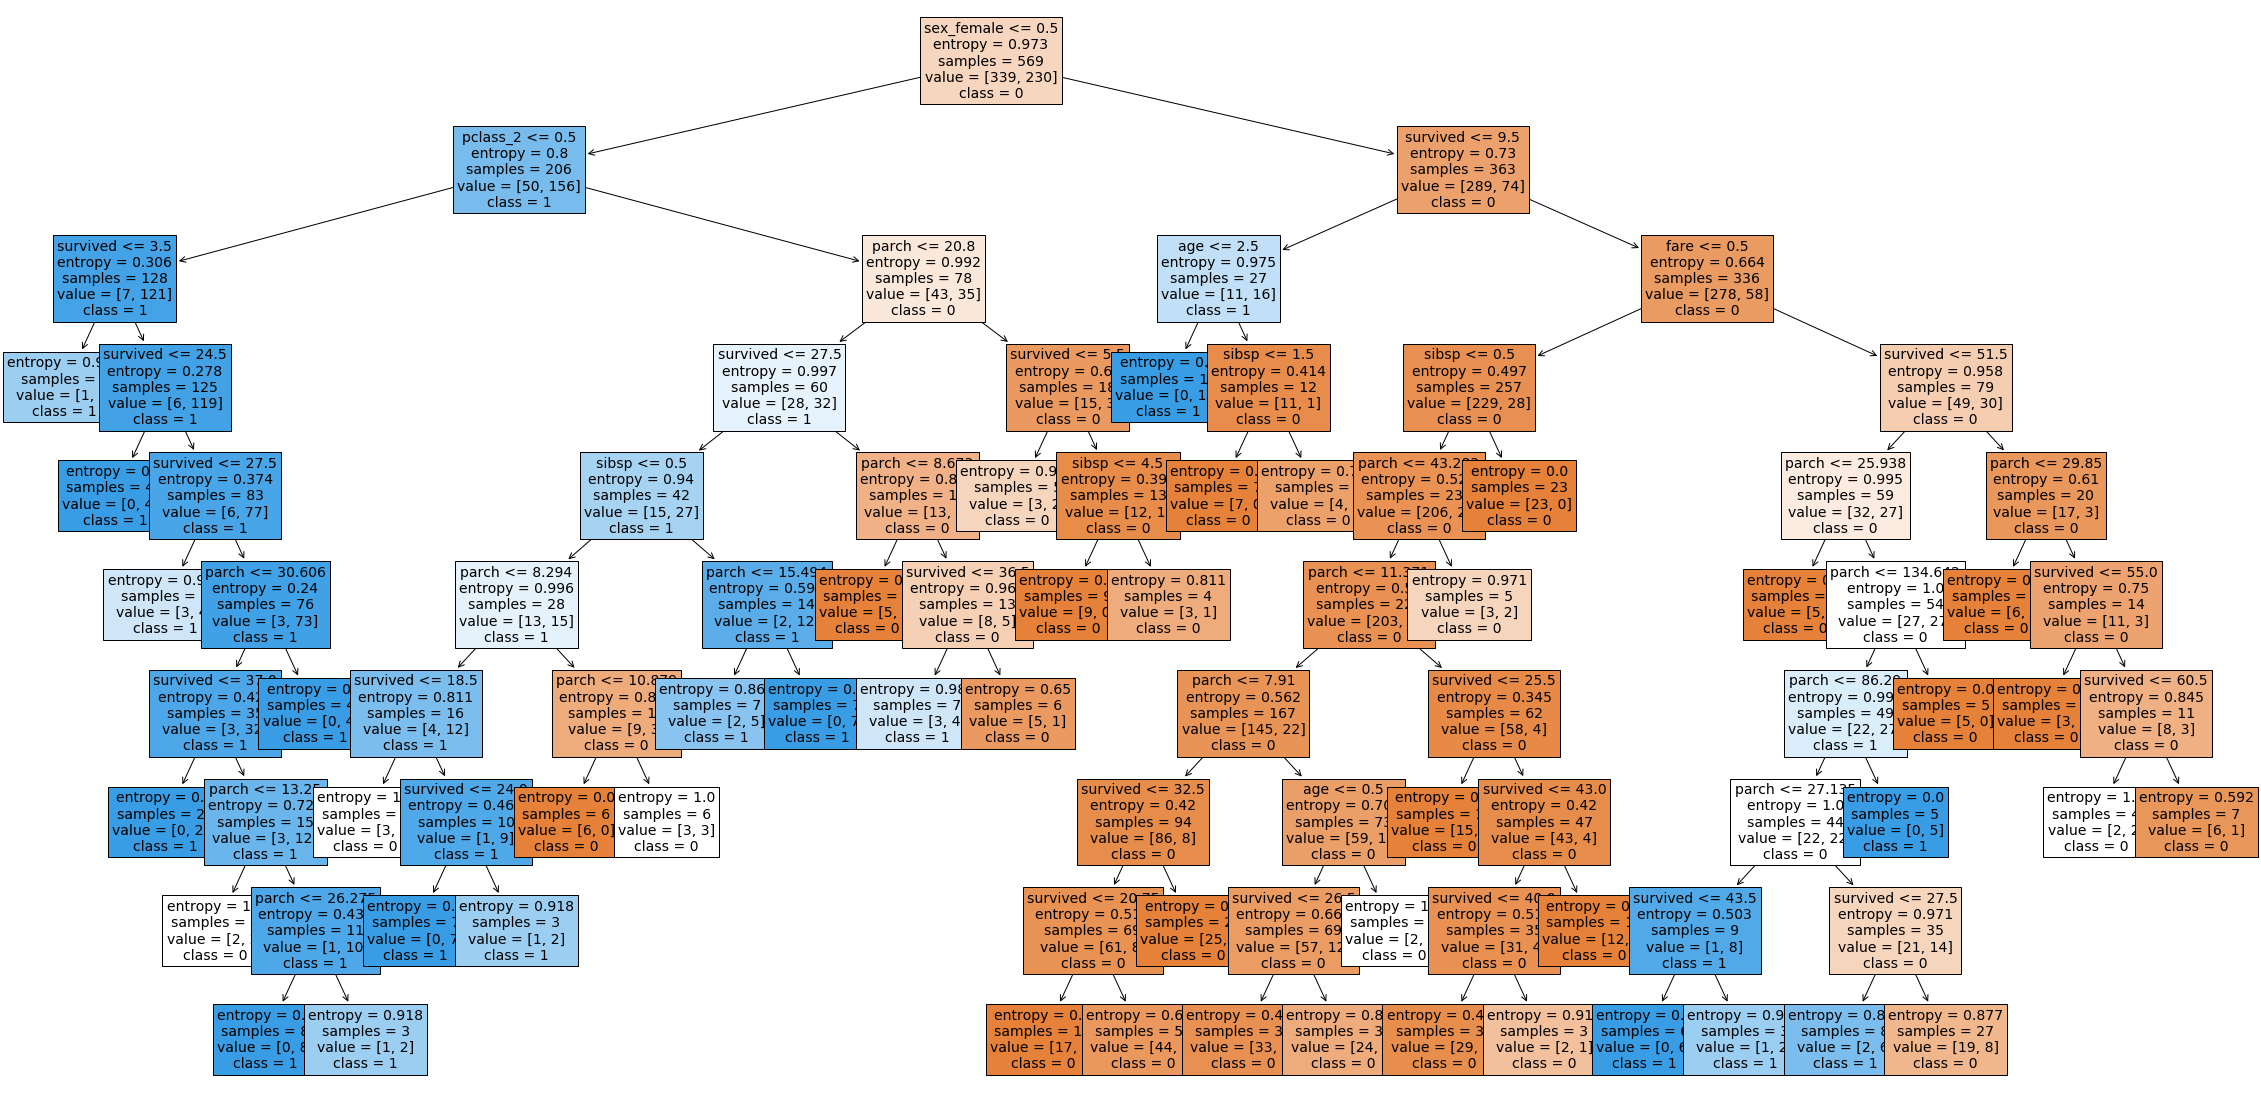

In [18]:
# Visualize the tree
from sklearn import tree

plt.figure(figsize=(40,20))
dtree_plot = tree.plot_tree(classifier,
                           feature_names = df.columns,
                           class_names = ['0','1'],
                           filled = True,
                           fontsize = 14)
plt.show()

### Step 4: Predict and Evaluate the model

In [19]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [20]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
190,1,1
292,0,0
762,1,0
737,1,0
812,0,0
722,0,0
93,0,0
802,1,1
873,0,0
307,1,1


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred, target_names=['0','1']))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        85
           1       0.76      0.67      0.72        58

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143




Text(33.0, 0.5, 'Predictions')

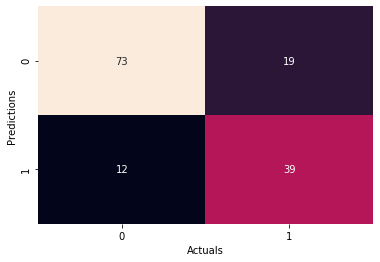

In [30]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(conf_mat.T, annot=True, cbar=False)
plt.xlabel("Actuals")
plt.ylabel("Predictions")

### Step 5: Do your own predictions

In [25]:
# Choose a random row from X_test
my_features = X_test.iloc[np.random.randint(0, len(X_test))]
own_pred = classifier.predict(my_features.to_numpy().reshape(1,-1))
print("My prediction is a {}.".format(own_pred[0]))
print("This was the input data:")
print(my_features)

My prediction is a 0.
This was the input data:
age           25.0
sibsp          1.0
parch          0.0
fare          17.8
pclass_1       0.0
pclass_2       0.0
pclass_3       1.0
embarked_C     0.0
embarked_Q     0.0
embarked_S     1.0
sex_female     0.0
sex_male       1.0
Name: 353, dtype: float64


## Exercise: To Identify digital numbers from scanned images

In [ ]:
# Load the dataset
df_data = datasets.load_digits()
class_names = df_data.target_names
df = pd.DataFrame(df_data.data, columns=df_data.feature_names)  # Inputs/Indep variables
df['class'] = df_data.target